In [1]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
from car import Sim
%matplotlib inline

In [2]:
number_of_cars_desired = 30
run_time_desired = 60
sim = Sim(number_of_cars_desired, run_time_desired)

In [3]:
simulation = sim.run_sim()

In [4]:
timeslice_locations = [[x] * number_of_cars_desired for x in range(run_time_desired)]

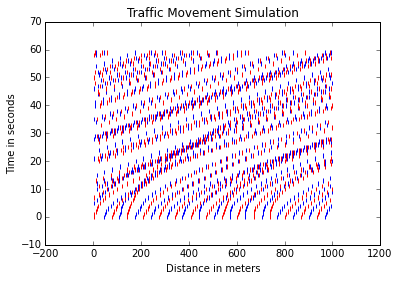

In [5]:
colors = ["red", "blue"]
plt.scatter(simulation[0], timeslice_locations, c=colors, marker="|")
plt.title("Traffic Movement Simulation")
plt.ylabel("Time in seconds")
plt.xlabel("Distance in meters")
plt.show()

In [17]:
mean_speeds = []
for speed in simulation[1]:
    time_slot_mean_speeds = statistics.mean(speed)
    mean_speeds.append(time_slot_mean_speeds)   
total_mean_speed = statistics.mean(mean_speeds)
standard_dev = []
for speed in simulation[1]:
    time_slot_standard_deviation = statistics.stdev(speed)
    standard_dev.append(time_slot_standard_deviation)
deviation = statistics.stdev(standard_dev)
optimal_speed = total_mean_speed + deviation
print(optimal_speed)

27.808719959135853


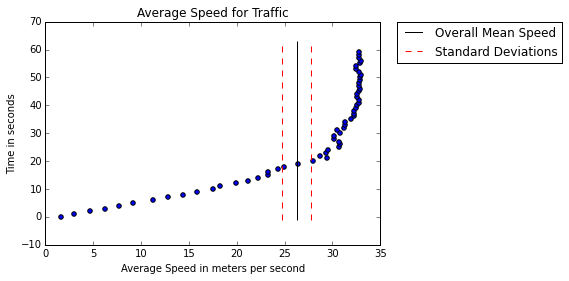

In [16]:
plt.scatter(mean_speeds, range(60))
plt.vlines(total_mean_speed, ymin=-1, ymax=63, label="Overall Mean Speed")
plt.vlines(total_mean_speed + deviation, ymin=-1, ymax=63, linestyle='dashed', color='red', label="Standard Deviations")
plt.vlines(total_mean_speed - deviation, ymin=-1, ymax=63, linestyle='dashed', color='red')
plt.title("Average Speed for Traffic")
plt.xlabel("Average Speed in meters per second")
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()